## Analysis 1
1) Perform general Data analysis
2)Can you tell me the Distribution of Vehicles based on Year of Registration with the help of a plot
3) Create a plot based on the Variation of the price range by the vehicle type
4) Find out Total count of vehicles by type available on ebay for sale.As well as create a visualization for the client
5) Is there any relationship between dollar_price and kilometer? (Explain with appropriate analysis)

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df = pd.read_csv(r"C:\Users\CHARISHMA\Downloads\autos.csv", encoding = 'unicode escape')

In [218]:
df.shape

(371528, 20)

In [219]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


## cleaning

#### Duplicate values

In [220]:
df[df.duplicated()]

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
179448,2016-03-08 18:42:48,Mercedes_Benz_CLK_Coupe_230_Kompressor_Sport,privat,Angebot,1799,test,coupe,1999,automatik,193,clk,20000,7,benzin,mercedes_benz,nein,2016-03-08 00:00:00,0,89518,2016-03-09 09:46:57
242556,2016-03-28 00:56:10,Suzuki_Ignis,privat,Angebot,1000,control,kleinwagen,2002,manuell,83,andere,150000,1,benzin,suzuki,nein,2016-03-28 00:00:00,0,66589,2016-03-28 08:46:21
270719,2016-04-03 09:01:15,Mercedes_Benz_CLK_320_W209,privat,Angebot,4699,test,coupe,2003,automatik,218,clk,125000,6,benzin,mercedes_benz,ja,2016-04-03 00:00:00,0,75196,2016-04-07 09:44:54
341474,2016-03-18 18:46:15,Volkswagen_Passat_Variant_1.9_TDI_Highline,privat,Angebot,1999,control,kombi,2001,manuell,131,passat,150000,7,diesel,volkswagen,nein,2016-03-18 00:00:00,0,36391,2016-03-18 18:46:15


In [221]:
df.duplicated().sum()

4

In [222]:
df.drop_duplicates(keep='first',inplace=True)

In [223]:
df.duplicated().sum()

0

In [224]:
df.drop('notRepairedDamage',inplace=True,axis=1)

In [225]:
df.isna().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 371524 entries, 0 to 371527
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371524 non-null  object
 1   name                 371524 non-null  object
 2   seller               371524 non-null  object
 3   offerType            371524 non-null  object
 4   price                371524 non-null  int64 
 5   abtest               371524 non-null  object
 6   vehicleType          333655 non-null  object
 7   yearOfRegistration   371524 non-null  int64 
 8   gearbox              351315 non-null  object
 9   powerPS              371524 non-null  int64 
 10  model                351040 non-null  object
 11  kilometer            371524 non-null  int64 
 12  monthOfRegistration  371524 non-null  int64 
 13  fuelType             338138 non-null  object
 14  brand                371524 non-null  object
 15  dateCreated          371524 non-null  o

In [227]:
df.drop('nrOfPictures',inplace=True,axis=1)

## Missing values

In [228]:
df.isna().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
dateCreated                0
postalCode                 0
lastSeen                   0
dtype: int64

In [229]:
df.dropna(axis=0,inplace=True)

In [230]:
df.shape

(299860, 18)

## Structural errors

In [231]:
yr = df[(df['yearOfRegistration'] < 1900) | (df['yearOfRegistration'] >2023)]

df.drop(yr.index, inplace = True)

df['powerPS'] = np.where((df['powerPS'] < 1) | (df['powerPS'] >2400), df['powerPS'].median(), df['powerPS'] )

df['monthOfRegistration'] = np.where((df['monthOfRegistration'] == 0), df['monthOfRegistration'].mode()[0], df['monthOfRegistration'] )

df.drop(df[(df['price']==0) | (df['price']>4000000) | (df['price']< 500)].index, inplace = True)

In [232]:
df['yearOfRegistration'].unique()

array([2004, 2001, 2008, 1995, 2014, 2005, 2011, 2007, 2009, 2002, 1990,
       1981, 2003, 1984, 2006, 1999, 1998, 2012, 2010, 2000, 1992, 1993,
       2013, 1994, 1997, 1991, 1996, 1989, 2015, 1968, 1982, 1983, 1959,
       1973, 1969, 1971, 1987, 1988, 1967, 2016, 1980, 1986, 1985, 1965,
       1945, 1974, 1979, 1955, 1978, 1976, 1972, 1977, 1966, 1975, 1970,
       1937, 1961, 1963, 1936, 1962, 1960, 1964, 1951, 1910, 1953, 1954,
       1957, 1958, 1956, 2017, 1941, 1950, 1948, 1932, 1952, 1927, 1931,
       2018, 1949, 1942, 1923, 1930, 1943, 1938, 1934, 1935, 1939, 1929,
       1928, 1933, 1947], dtype=int64)

In [233]:
df.shape

(280557, 18)

## Type casting

In [234]:
df['dateCrawled']=pd.to_datetime(df['dateCrawled'])
df["dateCreated"]=pd.to_datetime(df["dateCreated"])
df["lastSeen"]=pd.to_datetime(df["lastSeen"])

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 280557 entries, 2 to 371527
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dateCrawled          280557 non-null  datetime64[ns]
 1   name                 280557 non-null  object        
 2   seller               280557 non-null  object        
 3   offerType            280557 non-null  object        
 4   price                280557 non-null  int64         
 5   abtest               280557 non-null  object        
 6   vehicleType          280557 non-null  object        
 7   yearOfRegistration   280557 non-null  int64         
 8   gearbox              280557 non-null  object        
 9   powerPS              280557 non-null  float64       
 10  model                280557 non-null  object        
 11  kilometer            280557 non-null  int64         
 12  monthOfRegistration  280557 non-null  int64         
 13  fuelType           

In [236]:
df.shape

(280557, 18)

In [237]:
df.to_csv('autocsvstats.csv')

In [3]:
df = pd.read_csv(r"C:\Users\CHARISHMA\Advanced Data analysis project\autocsvstats.csv")

In [4]:
df.head()

,Unnamed: 0,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,dateCreated,postalCode,lastSeen
0,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163.0,grand,125000,8,diesel,jeep,2016-03-14,90480,2016-04-05 12:47:46
1,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75.0,golf,150000,6,benzin,volkswagen,2016-03-17,91074,2016-03-17 17:40:17
2,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69.0,fabia,90000,7,diesel,skoda,2016-03-31,60437,2016-04-06 10:17:21
3,5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102.0,3er,150000,10,benzin,bmw,2016-04-04,33775,2016-04-06 19:17:07
4,6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109.0,2_reihe,150000,8,benzin,peugeot,2016-04-01,67112,2016-04-05 18:18:39


### Can you tell me the Distribution of Vehicles based on Year of Registration with the help of a plot

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280557 entries, 0 to 280556
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           280557 non-null  int64  
 1   dateCrawled          280557 non-null  object 
 2   name                 280557 non-null  object 
 3   seller               280557 non-null  object 
 4   offerType            280557 non-null  object 
 5   price                280557 non-null  int64  
 6   abtest               280557 non-null  object 
 7   vehicleType          280557 non-null  object 
 8   yearOfRegistration   280557 non-null  int64  
 9   gearbox              280557 non-null  object 
 10  powerPS              280557 non-null  float64
 11  model                280557 non-null  object 
 12  kilometer            280557 non-null  int64  
 13  monthOfRegistration  280557 non-null  int64  
 14  fuelType             280557 non-null  object 
 15  brand            

<Axes: title={'center': 'Distribution of vehicles based on year'}, ylabel='Density'>

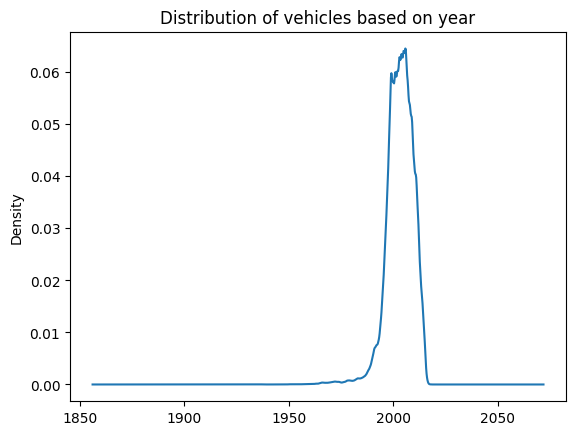

In [5]:
df['yearOfRegistration'].plot(kind='kde',
                              xlabel='yearOfRegistration',
                              ylabel='count',
                              title='Distribution of vehicles based on year')

* By observing the plot, we can conclude that the data(yearOfRegistration) is not following normal distribution
* It is left skewed, more data points on right side 

### Create a plot based on the Variation of the price range by the vehicle type

<Axes: xlabel='vehicleType'>

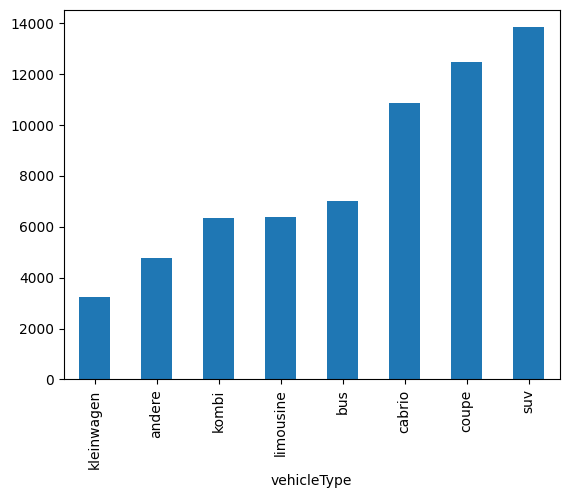

In [7]:
df.groupby(by='vehicleType')['price'].mean().sort_values().plot(kind='bar')

* variation of price range based on vehicle type : the highest price is having by SUV vehicle
* The lowest price having by kleinwagen

### Find out Total count of vehicles by type available on ebay for sale.As well as create a visualization for the client

<Axes: xlabel='vehicleType'>

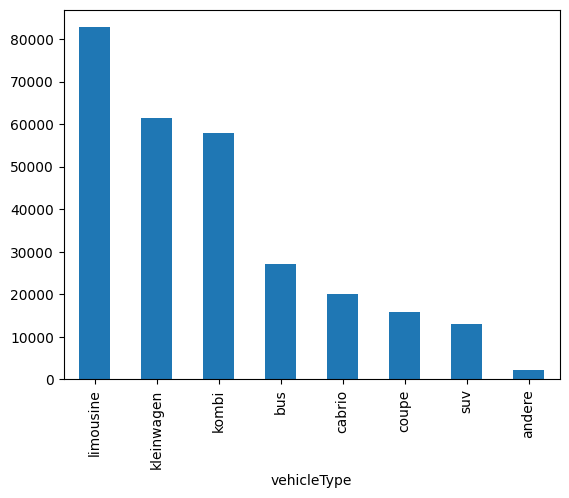

In [10]:
df['vehicleType'].value_counts().plot(kind='bar')

* count of vehicles by type : The top 1 count of cars is limousine
* The lowest is andere

### Is there any relationship between dollar_price and kilometer? (Explain with appropriate analysis)

<Axes: xlabel='price', ylabel='kilometer'>

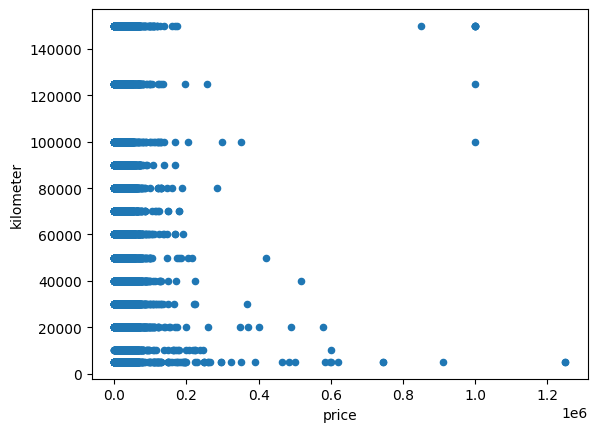

In [8]:
df.plot('price','kilometer',kind='scatter')

<Axes: >

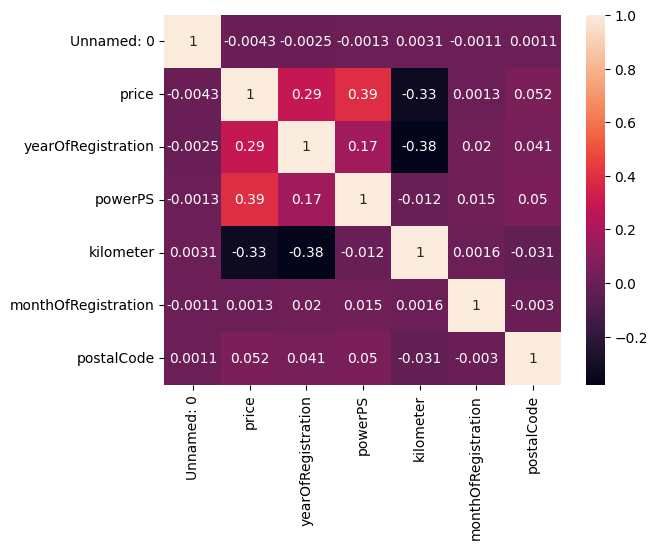

In [10]:
sn.heatmap(df.corr(numeric_only=True),annot= True)

* The relation between price and kilometer is negative relation 
* with -0.38 negative weak relation